<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 11.0 MB/s eta 0:00:00


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [7]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [8]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [9]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1649293286666, 42866.87912233698],
 [1649296978067, 43387.02637175187],
 [1649300555759, 43397.3674705263],
 [1649304061290, 43383.006317109226],
 [1649307734765, 43418.919106555986]]

Finally lets turn this data into a Pandas DataFrame.


In [10]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [12]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))

data['date']

0      2022-04-07
1      2022-04-07
2      2022-04-07
3      2022-04-07
4      2022-04-07
          ...    
716    2022-05-06
717    2022-05-06
718    2022-05-06
719    2022-05-07
720    2022-05-07
Name: date, Length: 721, dtype: object

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [13]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

candlestick

date         Price                                          
                         min           max         first          last
0   2022-04-07  42866.879122  43765.429731  42866.879122  43670.301981
1   2022-04-08  42444.332501  43822.021520  43515.150323  42444.332501
2   2022-04-09  42273.062845  42623.452844  42315.709724  42582.817718
3   2022-04-10  42179.073426  43281.042709  42796.397478  42179.073426
4   2022-04-11  39540.417712  42349.533795  42274.907370  39897.096196
5   2022-04-12  39445.203995  40659.510191  39552.830225  39827.632900
6   2022-04-13  39801.922378  41393.198322  40205.677941  41292.494034
7   2022-04-14  39821.386937  41522.566220  41231.707678  39849.991661
8   2022-04-15  39896.177425  40517.849696  39959.457069  40517.849696
9   2022-04-16  40098.001599  40621.902804  40586.597309  40465.067955
10  2022-04-17  40131.096659  40521.232216  40450.379305  40139.162696
11  2022-04-18  38779.594391  40887.730787  39739.119256  40887.730787
12  2022-04-19  40645.731265  41602.005418  40833.537965  41424.506607
13  2022-04-20  40983.013118  42127.855829  41498.122447  41498.596043
14  2022-04-21  40351.572487  42736.013160  41395.066535  40351.572487
15  2022-04-22  39396.300731  40688.513054  40528.541487  39721.677320
16  2022-04-23  39480.493788  39965.640291  39756.848993  39883.620573
17  2022-04-24  39431.281733  39871.651923  39555.127523  39609.288057
18  2022-04-25  38464.030123  40331.551400  39469.049862  40331.551400
19  2022-04-26  38111.337003  40606.773834  40458.131585  38280.499612
20  2022-04-27  38134.215451  39389.849240  38134.215451  39100.143654
21  2022-04-28  39137.803800  40183.528740  39223.932811  39750.785100
22  2022-04-29  38339.634475  39846.878355  39741.766646  38608.127256
23  2022-04-30  38347.128476  38755.914171  38650.550138  38347.128476
24  2022-05-01  37777.445035  38582.232256  37820.611765  38370.128720
25  2022-05-02  38285.703168  39036.508351  38537.654767  38631.281997
26  2022-05-03  37669.295717  38600.381689  38561.565399  37837.538218
27  2022-05-04  37758.496108  39874.562046  37758.496108  39750.579552
28  2022-05-05  36289.179381  39798.306471  39699.024041  36328.568060
29  2022-05-06  35655.519548  36612.229549  36612.229549  36059.424840
30  2022-05-07  36041.392529  36075.607637  36075.607637  36041.392529

Finally we are now ready to use plotly to create our Candlestick Chart.


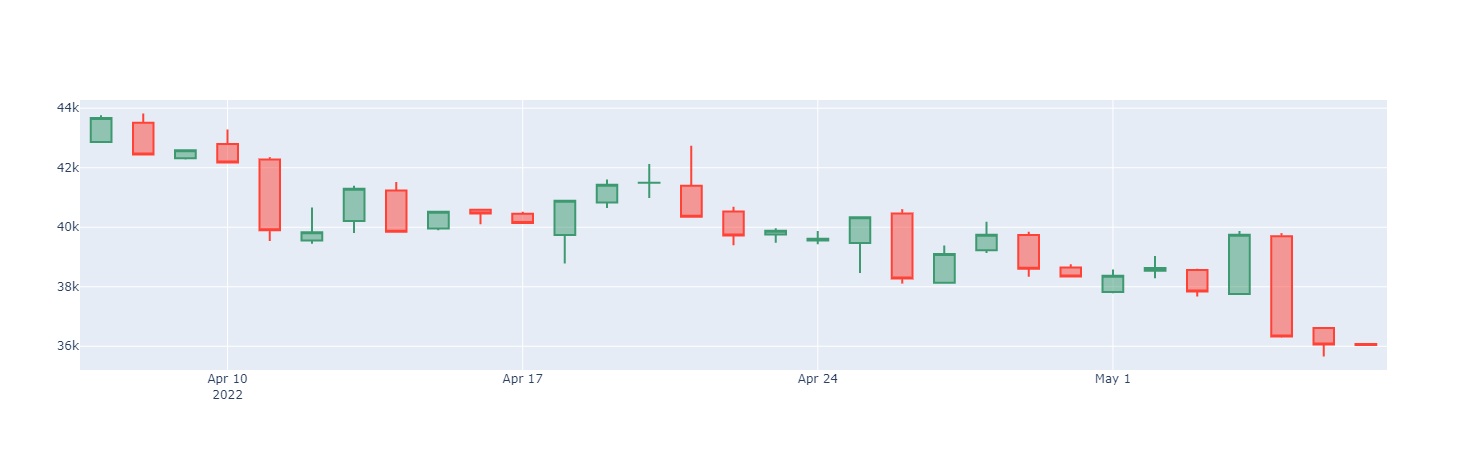

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
